In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager, CouplingMap, InstructionDurations, Layout
from qiskit.transpiler.passes import (
    CombineAdjacentDelays, 
    PadDelay, 
    ALAPScheduleAnalysis, 
    SetLayout, 
    ApplyLayout,
    DynamicalDecouplingMulti, 
    TimeUnitConversion, 
    ConstrainedReschedule,
    FullAncillaAllocation,
    ApplyLayout,
)
from qiskit.visualization import timeline_drawer
from qiskit.converters import circuit_to_dag
from qiskit.circuit.delay import Delay

In [2]:
qubits = [28, 29, 30, 31, 32, 36, 51, 50, 49, 48, 47, 35]
sub_qubits = [28, 31, 32, 36, 51, 48]
# get backend

# uncomment to use hardware backend
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(backend_name)
# Aer simulator backend
# provider = None
# backend_name = "aer_simulator"

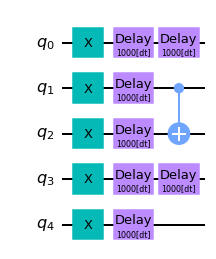

In [3]:
coupling_map = [0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]
qc = QuantumCircuit(5)
qc.x(range(5))
qc.delay(1000, [0, 1, 2, 3, 4])
qc.cx(1, 2)
qc.delay(1000, 0)
qc.delay(1000, 3)
qc.draw('mpl')

In [4]:
coupling_map = CouplingMap(coupling_map)
durations = InstructionDurations.from_backend(backend)
pm = PassManager([
    TimeUnitConversion(durations),
    ALAPScheduleAnalysis(durations), 
    PadDelay(),  
    CombineAdjacentDelays(coupling_map)])
transpiled = pm.run(qc)

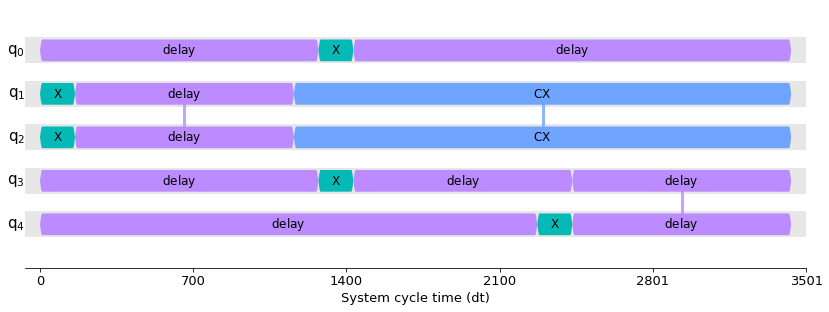

In [5]:
timeline_drawer(transpiled, show_delays=True)

In [9]:
import retworkx as rx
coupling_map = CouplingMap([[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [5, 4], [4, 5], [5, 6], [6, 5]])
reduced = coupling_map.reduce([6, 4, 2, 0, 1])
print(reduced)
print(reduced.is_connected())
undirected = reduced.graph.to_undirected()
print(rx.connected_components(undirected))
islands = []
# print(rx.node_connected_component(undirected, 3))
for node in rx.connected_components(undirected):
    for index in node:
        print(index)
    # islands.append(rx.node_connected_component(undirected, node))

[[3, 4], [4, 3], [4, 2], [2, 4]]
False
[{0}, {1}, {2, 3, 4}]
0
1
2
3
4
